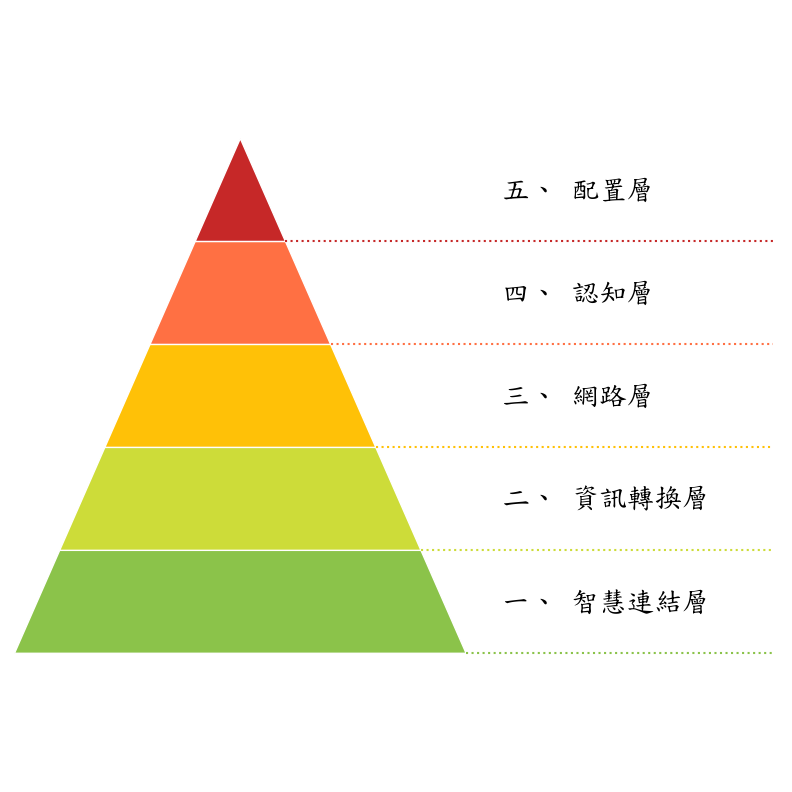

In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib

# ------------------------------------------------------------
# 0.  全域設定
# ------------------------------------------------------------
matplotlib.rcParams["font.family"] = "DFKai-SB"   # 中文字體
# Windows 使用者可改成：
# matplotlib.rcParams["font.family"] = "Microsoft JhengHei"

# ------------------------------------------------------------
# 1.  基本幾何
# ------------------------------------------------------------
height     = 2          # 金字塔高度 (y‑axis)
half_base  = 25         # 半底寬 (x‑axis)
n_levels   = 5          # 5‑C → 五層
y_levels   = [height * i / n_levels for i in range(n_levels + 1)]

# ------------------------------------------------------------
# 2.  文字與顏色（由下而上）
# ------------------------------------------------------------
labels  = [
    "一、 智慧連結層",
    "二、 資訊轉換層",
    "三、 網路層",
    "四、 認知層",
    "五、 配置層",
]
colours = ["#8BC34A", "#CDDC39", "#FFC107", "#FF7043", "#C62828"]

# ------------------------------------------------------------
# 3.  工具：計算任意 y 對應右邊斜邊的 x
# ------------------------------------------------------------
def side_x(y: float) -> float:
    return (height - y) * half_base / height

# ------------------------------------------------------------
# 4.  繪圖
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))

label_offset = 4.0   # 標籤離三角形右緣的水平距離
line_extra   = 30.0   # 虛線再往右延伸的距離
label_x      = half_base + label_offset
line_end_x   = label_x + line_extra

for i in range(n_levels):
    # -- 本層上下邊的 y 座標
    y0, y1 = y_levels[i], y_levels[i + 1]

    # -- 斜邊的 x 座標
    x_left0,  x_right0  = -side_x(y0),  side_x(y0)
    x_left1,  x_right1  = -side_x(y1),  side_x(y1)

    # -- 最上層為三角形，其餘為梯形
    verts = (
        [(x_left0, y0), (x_right0, y0), (0, y1)]
        if i == n_levels - 1
        else [(x_left0, y0), (x_right0, y0), (x_right1, y1), (x_left1, y1)]
    )
    ax.add_patch(Polygon(verts, closed=True,
                         facecolor=colours[i], edgecolor="white"))

    # ----------  標籤：靠右、顏色同層  ----------
    cy = (y0 + y1) / 2
    ax.text(label_x, cy, labels[i],
            color="black", ha="left", va="center", fontsize=20)

    # ----------  底邊右側虛線  ----------
    ax.plot([x_right0, line_end_x], [y0, y0],
            linestyle=":", linewidth=1.5, color=colours[i])

# ------------------------------------------------------------
# 5.  範圍與輸出
# ------------------------------------------------------------
ax.set_xlim(-half_base - 0.5, line_end_x + 1)
ax.set_ylim(-0.5, height + 0.5)
ax.axis("off")

plt.tight_layout(pad=1.0)   # add a little padding so nothing is clipped
fig.savefig("CPS_5C_pyramid.png", dpi=600, bbox_inches="tight")
plt.show()


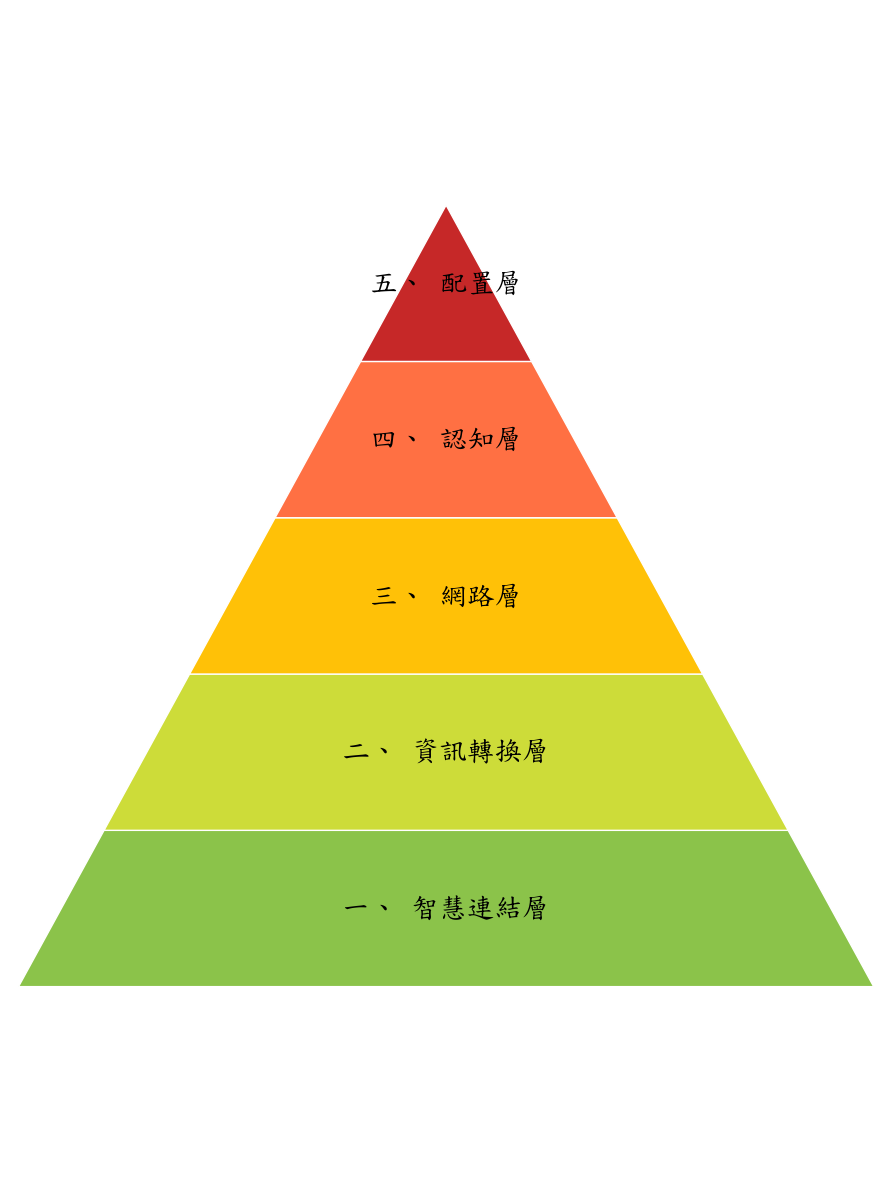

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib

matplotlib.rcParams['font.family'] = 'DFKai-SB'  # use a Chinese font
# ───────────────────────────────────────────────────────────
# 1.  basic geometry
# ───────────────────────────────────────────────────────────
height    = 2        # pyramid height (y‑axis)
half_base = 25    # half of the base width (x‑axis).  tweak this freely

n_levels  = 5        # 5‑C architecture → five horizontal slices
y_levels  = [height * i / n_levels for i in range(n_levels + 1)]

# ───────────────────────────────────────────────────────────
# 2.  labels & colours  (bottom → top)
# ───────────────────────────────────────────────────────────
labels  = [
    "一、 智慧連結層",
    "二、 資訊轉換層",
    "三、 網路層",
    "四、 認知層",
    "五、 配置層",
]
colours = ["#8BC34A", "#CDDC39", "#FFC107", "#FF7043", "#C62828"]

# If you run on Windows and have 微軟正黑體 installed, uncomment:
# matplotlib.rcParams["font.family"] = "Microsoft JhengHei"

# ───────────────────────────────────────────────────────────
# 3.  helper: x‑coordinate on the side edge at a given y
#     (linear interpolation between apex (0, height) and base (±half_base, 0))
# ───────────────────────────────────────────────────────────
def side_x(y: float) -> float:
    return (height - y) * half_base / height

# ───────────────────────────────────────────────────────────
# 4.  plotting
# ───────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 12))

for i in range(n_levels):
    y0, y1 = y_levels[i], y_levels[i + 1]

    x_left0,  x_right0  = -side_x(y0),  side_x(y0)
    x_left1,  x_right1  = -side_x(y1),  side_x(y1)

    # top slice is a triangle, others are trapezoids
    if i == n_levels - 1:
        verts = [(x_left0, y0), (x_right0, y0), (0, y1)]
    else:
        verts = [(x_left0, y0), (x_right0, y0), (x_right1, y1), (x_left1, y1)]

    ax.add_patch(Polygon(verts, closed=True,
                         facecolor=colours[i], edgecolor="white"))

    # put label in the centre of the slice
    cy = (y0 + y1) / 2
    ax.text(0, cy, labels[i], ha="center", va="center", fontsize=20, wrap=True)

# ───────────────────────────────────────────────────────────
# 5.  axis limits & layout
# ───────────────────────────────────────────────────────────
margin = 0.5
ax.set_xlim(-half_base - margin, half_base + margin)
ax.set_ylim(-0.5, height + 0.5)
ax.axis("off")

plt.tight_layout(pad=1.0)   # add a little padding so nothing is clipped
fig.savefig("CPS_5C_pyramid.png", dpi=600, bbox_inches="tight")
plt.show()
